## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# resolve warnings
warnings.simplefilter(action = 'ignore')
# use plots from seaborn
plt.style.use('seaborn')

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn import preprocessing

D:\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
# import dataset
data = pd.read_csv('cardata.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
# show 10 first from dataset
data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [4]:
# count of row and columns
data.shape

(301, 9)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
# we dont have missing value
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## PreProcessing

In [8]:
# show the year of production for the cars
data['Year']

0      2014
1      2013
2      2017
3      2011
4      2014
       ... 
296    2016
297    2015
298    2009
299    2017
300    2016
Name: Year, Length: 301, dtype: int64

In [9]:
np.max(data['Year'])

2018

In [10]:
# Create the Year column to represent the age of each car
data['Age'] = 2019 - data['Year']
data.drop('Year', axis=1, inplace=True)

In [11]:
data

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,5
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,6
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,2
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,8
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,5
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,Diesel,Dealer,Manual,0,3
297,brio,4.00,5.90,60000,Petrol,Dealer,Manual,0,4
298,city,3.35,11.00,87934,Petrol,Dealer,Manual,0,10
299,city,11.50,12.50,9000,Diesel,Dealer,Manual,0,2


# Type of column

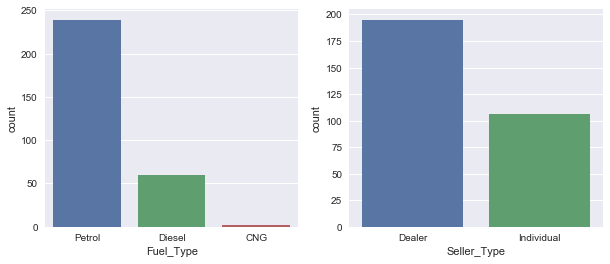

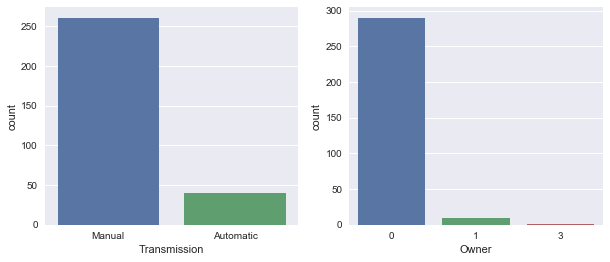

In [12]:
# Categorical
Categorical = ['Fuel_Type','Seller_Type','Transmission','Owner']
i = 0
while i < 4 :
    fig = plt.figure(figsize=[10,4])
    plt.subplot(1,2,1)
    sns.countplot(x=Categorical[i] , data = data)
    i += 1
    plt.subplot(1,2,2)
    sns.countplot(x=Categorical[i] , data = data)
    i += 1
    plt.show()

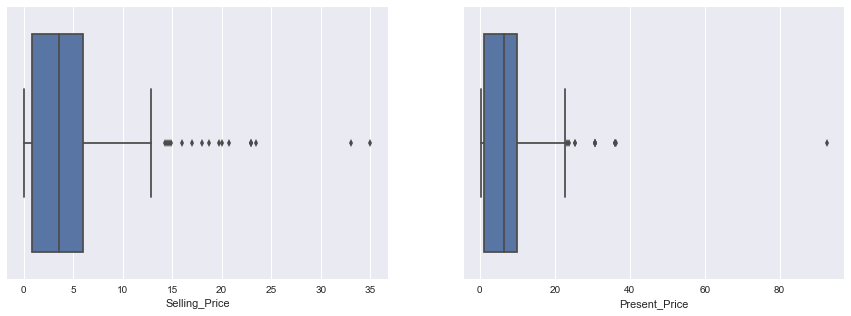

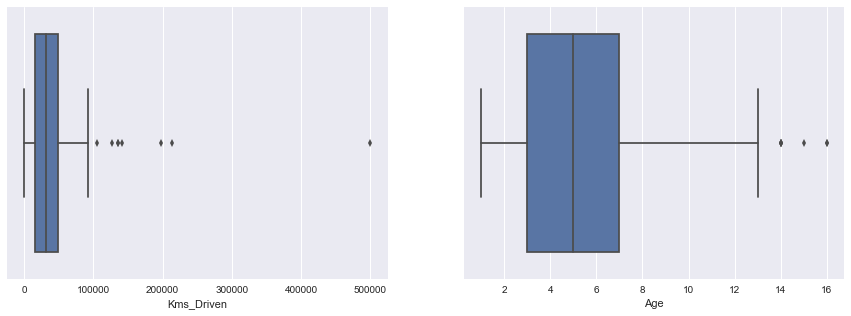

In [13]:
# Numerical
Numerical = ['Selling_Price','Present_Price','Kms_Driven','Age']
i = 0
while i < 4 :
    fig = plt.figure(figsize=[15,5])
    plt.subplot(1,2,1)
    sns.boxplot(x=Numerical[i] , data = data)
    i += 1
    plt.subplot(1,2,2)
    sns.boxplot(x=Numerical[i] , data = data)
    i += 1
    plt.show()

In [14]:
# Correlation
data.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104
Age,-0.236141,0.047584,0.524342,0.182104,1.000000


In [15]:
# Display the unique values in each column
print(pd.unique(data['Fuel_Type']))
print(pd.unique(data['Seller_Type']))
print(pd.unique(data['Transmission']))
print(pd.unique(data['Owner']))

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [16]:
# convert Categorical to Numerical
data['Fuel_Type'].replace({'Petrol':2 ,'Diesel':3, 'CNG':4}, inplace=True)
data['Seller_Type'].replace({'Dealer':2 ,'Individual':3}, inplace=True)
data['Transmission'].replace({'Manual':2 ,'Automatic':3}, inplace=True)
data

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,2,2,2,0,5
1,sx4,4.75,9.54,43000,3,2,2,0,6
2,ciaz,7.25,9.85,6900,2,2,2,0,2
3,wagon r,2.85,4.15,5200,2,2,2,0,8
4,swift,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...
296,city,9.50,11.60,33988,3,2,2,0,3
297,brio,4.00,5.90,60000,2,2,2,0,4
298,city,3.35,11.00,87934,2,2,2,0,10
299,city,11.50,12.50,9000,3,2,2,0,2


In [17]:
# delete Car_Name column
data.drop(labels='Car_Name', axis=1 , inplace=True)
data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,3,2,2,0,3
297,4.00,5.90,60000,2,2,2,0,4
298,3.35,11.00,87934,2,2,2,0,10
299,11.50,12.50,9000,3,2,2,0,2


## Create Model

In [18]:
# ceparating target variable and features
x = data.drop('Selling_Price', axis=1)
y = data['Selling_Price']

In [19]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=1)
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (240, 7)
x_test:  (61, 7)
y_train:  (240,)
y_test:  (61,)


In [20]:
Model = LinearRegression()
Model.fit(x_train, y_train)

LinearRegression()

In [21]:
y_pred = Model.predict(x_test)

In [22]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print("R2 Score: ", metrics.r2_score(y_test,y_pred))

Mean Absolute Error:  1.153004591615892
Mean Squared Error:  3.287646085715837
Root Mean Squared Error:  1.073780513706545
R2 Score:  0.848454941209038


## Improve Model

In [23]:
# use cross validation
k_fold = KFold(10)
print(cross_val_score(Model, x, y.ravel(), cv=k_fold, n_jobs=1))

[ 6.63522141e-01  8.80842763e-01  7.23708463e-01  8.63126108e-01
 -4.36488306e+01 -1.07944231e+03 -3.50129071e-01  7.84378582e-01
  8.27975783e-01  8.74089252e-01]


## delete fold 5, 6, 7

In [24]:
data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,3,2,2,0,3
297,4.00,5.90,60000,2,2,2,0,4
298,3.35,11.00,87934,2,2,2,0,10
299,11.50,12.50,9000,3,2,2,0,2


In [25]:
len(data)/10

30.1

In [26]:
data1 = data[data.index < 120]
data2 = data[data.index > 210]
data3 = data1.append(data2)
data3.reset_index(drop=True , inplace=True)
data3

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
205,9.50,11.60,33988,3,2,2,0,3
206,4.00,5.90,60000,2,2,2,0,4
207,3.35,11.00,87934,2,2,2,0,10
208,11.50,12.50,9000,3,2,2,0,2


In [27]:
# new model
x2 = data3.drop('Selling_Price', axis=1)
y2 = data3['Selling_Price']
x_train2, x_test2, y_train2, y_test2 =train_test_split(x2, y2, test_size=0.2, random_state=1)
Model2 = LinearRegression()
Model2.fit(x_train2, y_train2)

LinearRegression()

In [28]:
y_pred2 = Model2.predict(x_test2)

In [29]:
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test2,y_pred2))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test2,y_pred2))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_absolute_error(y_test2,y_pred2)))
print("R2 Score: ", metrics.r2_score(y_test2,y_pred2))

Mean Absolute Error:  1.2344068697754265
Mean Squared Error:  2.6238982580770474
Root Mean Squared Error:  1.1110386445913691
R2 Score:  0.8793462370194999


## R2_score2 = 0.879 > R2_score1 = 0.84

In [30]:
print('Model Intercept =' , Model2.intercept_)
print('Model Coefs =' , Model2.coef_)

Model Intercept = -1.6962350442029512
Model Coefs = [ 4.42320455e-01 -2.66901271e-05  2.25919515e+00 -1.26225774e+00
  2.10515821e+00 -1.13003710e+00 -4.62552614e-01]


In [31]:
# result model with input data
y_pred2 = Model2.predict([[11.23,42000,1,4,6,1,10]])
y_pred2

array([6.23558857])

In [32]:
## Check Out Noises
print(pd.unique(data['Fuel_Type']))
print(pd.unique(data['Seller_Type']))
print(pd.unique(data['Transmission']))
print(pd.unique(data['Owner']))

[2 3 4]
[2 3]
[2 3]
[0 1 3]


## There is not any noise here!

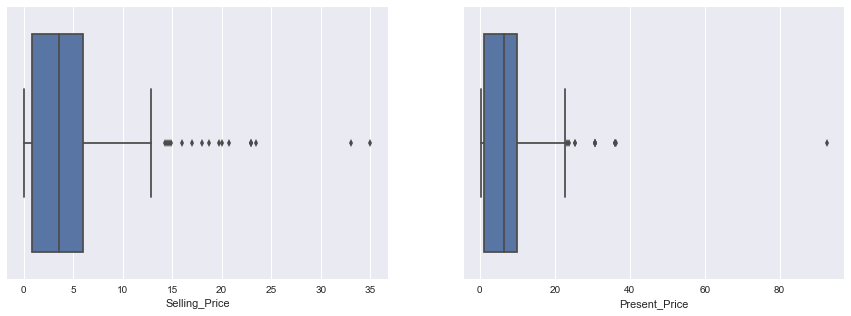

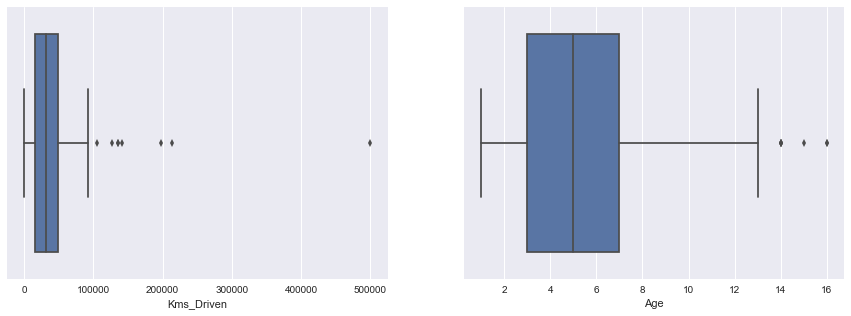

In [33]:
# but for Numerical features
Numerical = ['Selling_Price','Present_Price','Kms_Driven','Age']
i = 0
while i < 4 :
    fig = plt.figure(figsize=[15,5])
    plt.subplot(1,2,1)
    sns.boxplot(x=Numerical[i] , data=data)
    i += 1
    plt.subplot(1,2,2)
    sns.boxplot(x=Numerical[i] , data=data)
    i += 1
    plt.show()

### Selling_Price < 30
### Present_Price < 80
### Kms_Driven < 400000
### Noise ? No way, All okay

# Create our model

### simple one

In [34]:
x = pd.DataFrame(data, columns=['Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner','Age'])
y = data.Selling_Price.values.reshape(-1,1)
data

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,2,2,2,0,5
1,4.75,9.54,43000,3,2,2,0,6
2,7.25,9.85,6900,2,2,2,0,2
3,2.85,4.15,5200,2,2,2,0,8
4,4.60,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,3,2,2,0,3
297,4.00,5.90,60000,2,2,2,0,4
298,3.35,11.00,87934,2,2,2,0,10
299,11.50,12.50,9000,3,2,2,0,2


In [35]:
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=1)
Model = LinearRegression()
Model.fit(x_train, y_train)
y_pred = Model.predict(x_test)
r2 = metrics.r2_score(y_test , y_pred)
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print("R2 Score: ",r2)

Mean Absolute Error:  1.153004591615892
Mean Squared Error:  3.287646085715837
Root Mean Squared Error:  1.073780513706545
R2 Score:  0.848454941209038


### Seems Good! 84% Acc
### But can we improve our model ?
### Lets try
### Trying to make non linear features

## Dimension = X^2

In [36]:
# making function
def check(Dimension, testsize):
    r2 = 0.848454941209038
    for column in x:
        New_Col_Name = column + str(Dimension)
        New_Col_Val = x[column]**Dimension
        x.insert(0, New_Col_Name, New_Col_Val)
        x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=testsize, random_state=0)
        New_Model = LinearRegression()
        New_Model.fit(x_train, y_train)
        y_pred = New_Model.predict(x_test)
        r2_New = metrics.r2_score(y_test, y_pred)
        if r2_New < r2:
            x.drop([New_Col_Name], axis=1, inplace=True)
        else:
            r2 = r2_New
    print('R2_score:', r2)
    
    
check(2,0.2)   

R2_score: 0.9311515326441929


In [37]:
# See which of the features have their power of 2 added to the features?
x

,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...
296,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
297,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
298,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
299,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


## Well Done! +9%

### Higher Dimensions did not change the score
### Another way : DotProduct Features

#### dont use loop for this part if you have limited features!

In [38]:
# create 8 new parameter 
Pres_kms = x['Present_Price'] * x['Kms_Driven']
Pres_kms2 = x['Present_Price'] * x['Kms_Driven2']
Pres_Fuel = x['Present_Price'] * x['Fuel_Type']
Pres_Fuel2 = x['Present_Price'] * x['Fuel_Type2']
Pres2_kms = x['Present_Price2'] * x['Kms_Driven']
Pres2_kms2 = x['Present_Price2'] * x['Kms_Driven2']
Pres2_Fuel = x['Present_Price2'] * x['Fuel_Type']
Pres2_Fuel2 = x['Present_Price2'] * x['Fuel_Type2']

In [39]:
# Adding new parameter to the columns.
x.insert(0,'Pres_kms',Pres_kms)
x.insert(0,'Pres_kms2',Pres_kms2)
x.insert(0,'Pres_Fuel',Pres_Fuel)
x.insert(0,'Pres_Fuel2',Pres_Fuel2)
x.insert(0,'Pres2_kms',Pres2_kms)
x.insert(0,'Pres2_kms2',Pres2_kms2)
x.insert(0,'Pres2_Fuel',Pres2_Fuel)
x.insert(0,'Pres2_Fuel2',Pres2_Fuel2)

In [40]:
# Creating a new model with new x.
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size=0.2, random_state=0)
Model = LinearRegression()
Model.fit(x_train, y_train)
y_pred = Model.predict(x_test)
r2 = metrics.r2_score(y_test, y_pred)
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print("R2 Score: ",r2)

Mean Absolute Error:  0.7263874110386839
Mean Squared Error:  1.1927444595421526
Root Mean Squared Error:  0.8522836447091331
R2 Score:  0.9528136476886958


## Oops!!! 0.95! Nice?!

### New lets try K-fold

In [41]:
k_fold = KFold(n_splits=5)
results = (cross_val_score(Model, x, y, cv=k_fold, n_jobs=1))
print(results)
print(np.mean(results))

[  0.92455671   0.47741608 -23.72958619   0.58594989   0.88656022]
-4.171020658984824


In [42]:
# At first, we fold up the third fold.
x.shape

(301, 19)

In [43]:
301 / 6

50.166666666666664

In [44]:
df = x[x.index < 100]
df2 = x[x.index > 151]
x_new = df.append(df2)
x_new.reset_index(drop=True , inplace=True)
x_new

,Pres2_Fuel2,Pres2_Fuel,Pres2_kms2,Pres2_kms,Pres_Fuel2,Pres_Fuel,Pres_kms2,Pres_kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,124.9924,62.4962,2.277986e+10,8.436987e+05,22.36,11.18,4.075110e+09,150930.0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,819.1044,273.0348,1.682804e+11,3.913499e+06,85.86,28.62,1.763946e+10,410220.0,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,388.0900,194.0450,4.619241e+09,6.694552e+05,39.40,19.70,4.689585e+08,67965.0,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,68.8900,34.4450,4.656964e+08,8.955700e+04,16.60,8.30,1.122160e+08,21580.0,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,424.7721,141.5907,8.504893e+10,2.003508e+06,61.83,20.61,1.237976e+10,291631.5,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,1211.0400,403.6800,1.554416e+11,4.573425e+06,104.40,34.80,1.340014e+10,394260.8,0,9,1155184144,134.5600,11.60,33988,3,2,2,0,3
245,139.2400,69.6200,1.253160e+11,2.088600e+06,23.60,11.80,2.124000e+10,354000.0,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
246,484.0000,242.0000,9.356190e+11,1.064001e+07,44.00,22.00,8.505627e+10,967274.0,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
247,1406.2500,468.7500,1.265625e+10,1.406250e+06,112.50,37.50,1.012500e+09,112500.0,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2


In [45]:
# We do exactly the same thing for target.
y = data['Selling_Price']
y1 = y[y.index < 100]
y2 = y[y.index > 151]
y_new = y1.append(y2)
y_new.reset_index(drop=True , inplace=True)
y_new.shape

(249,)

In [46]:
# Creating a new model with new x_new.
x_train, x_test, y_train, y_test =train_test_split(x_new, y_new, test_size=0.2, random_state=0)
Model = LinearRegression()
Model.fit(x_train, y_train)
y_pred = Model.predict(x_test)
r2 = metrics.r2_score(y_test, y_pred)
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print("R2 Score: ",r2)

Mean Absolute Error:  0.6748046027859198
Mean Squared Error:  0.8403528849999867
Root Mean Squared Error:  0.8214649126931227
R2 Score:  0.9771368926209408


## Wooow !!! almost 98%

### Now lets try Normalization

In [47]:
print(x_new[0:5])
x_new.insert(0, 'Target', y_new) # because is better to have the target and features in one dataframe for normalization.
DataFrame = x_new
DataFrame
Scaler = preprocessing.StandardScaler().fit(DataFrame)
Norm = Scaler.transform(DataFrame.astype(float))
print(Norm[0:5])

   Pres2_Fuel2  Pres2_Fuel    Pres2_kms2    Pres2_kms  Pres_Fuel2  Pres_Fuel  \
0     124.9924     62.4962  2.277986e+10   843698.700       22.36      11.18   
1     819.1044    273.0348  1.682804e+11  3913498.800       85.86      28.62   
2     388.0900    194.0450  4.619241e+09   669455.250       39.40      19.70   
3      68.8900     34.4450  4.656964e+08    89557.000       16.60       8.30   
4     424.7721    141.5907  8.504893e+10  2003508.405       61.83      20.61   

      Pres_kms2  Pres_kms  Owner2  Fuel_Type2  Kms_Driven2  Present_Price2  \
0  4.075110e+09  150930.0       0           4    729000000         31.2481   
1  1.763946e+10  410220.0       0           9   1849000000         91.0116   
2  4.689585e+08   67965.0       0           4     47610000         97.0225   
3  1.122160e+08   21580.0       0           4     27040000         17.2225   
4  1.237976e+10  291631.5       0           9   1802002500         47.1969   

   Present_Price  Kms_Driven  Fuel_Type  Seller_Ty

In [48]:
x_norm = DataFrame.drop(['Target'], axis=1)
y_norm = DataFrame['Target'].values.reshape(-1,1)

In [49]:
# Creating a new model with new x_norm.
x_train, x_test, y_train, y_test =train_test_split(x_norm, y_norm, test_size=0.2, random_state=0)
Model = LinearRegression()
Model.fit(x_train, y_train)
y_pred = Model.predict(x_test)
r2 = metrics.r2_score(y_test, y_pred)
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print("R2 Score: ",r2)

Mean Absolute Error:  0.6748046027859198
Mean Squared Error:  0.8403528849999867
Root Mean Squared Error:  0.8214649126931227
R2 Score:  0.9771368926209408


# Same ! Yeap

#### Why didn't we normalize it earlier?
#### Because the default of sklearn is to normalize the features and target you provide.

## Visualization of Model

In [50]:
x_new.drop(['Target'], axis=1, inplace=True)

In [51]:
# Creating a new model with new x_new.
x_train, x_test, y_train, y_test =train_test_split(x_new, y_new, test_size=0.2, random_state=0)
Model = LinearRegression()
Model.fit(x_train, y_train)
y_pred = Model.predict(x_test)
r2 = metrics.r2_score(y_test, y_pred)
print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print("R2 Score: ",r2)

Mean Absolute Error:  0.6748046027859198
Mean Squared Error:  0.8403528849999867
Root Mean Squared Error:  0.8214649126931227
R2 Score:  0.9771368926209408


In [52]:
x_test

,Pres2_Fuel2,Pres2_Fuel,Pres2_kms2,Pres2_kms,Pres_Fuel2,Pres_Fuel,Pres_kms2,Pres_kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
248,139.240000,69.620000,1.039263e+09,1.902018e+05,23.600,11.800,1.761462e+08,32237.60,0,4,29855296,34.810000,5.900,5464,2,2,2,0,3
168,78.499600,39.249800,2.907088e+10,7.553232e+05,17.720,8.860,6.562275e+09,170501.84,0,4,1481326144,19.624900,4.430,38488,2,2,2,0,2
76,862.009600,431.004800,1.117164e+12,1.551617e+07,58.720,29.360,7.610112e+10,1056960.00,0,4,5184000000,215.502400,14.680,72000,2,2,2,0,6
150,129.960000,64.980000,2.583735e+10,9.162180e+05,22.800,11.400,4.532868e+09,160740.00,0,4,795240000,32.490000,5.700,28200,2,2,2,0,4
145,1.040400,0.520200,2.832489e+08,8.583300e+03,2.040,1.020,5.553900e+08,16830.00,0,4,1089000000,0.260100,0.510,33000,2,3,2,0,9
73,130.416400,65.208200,6.028498e+10,1.401976e+06,22.840,11.420,1.055779e+10,245530.00,0,4,1849000000,32.604100,5.710,43000,2,2,2,0,8
45,579.846400,289.923200,3.261636e+10,2.174424e+06,48.160,24.080,2.709000e+09,180600.00,0,4,225000000,144.961600,12.040,15000,2,2,3,0,5
159,1968.696900,656.232300,4.145849e+11,9.523024e+06,133.110,44.370,2.803143e+10,643882.65,0,9,1895296225,218.744100,14.790,43535,3,2,2,0,4
218,400.000000,200.000000,4.808174e+11,6.934100e+06,40.000,20.000,4.808174e+10,693410.00,0,4,4808174281,100.000000,10.000,69341,2,2,2,0,8
213,302.760000,151.380000,3.401811e+10,1.604628e+06,34.800,17.400,3.910128e+09,184440.00,0,4,449440000,75.690000,8.700,21200,2,2,2,0,2


In [53]:
x_test.insert(0, 'y_test', y_test)
x_test.insert(0, 'y_pred', y_pred)
x_test

,y_pred,y_test,Pres2_Fuel2,Pres2_Fuel,Pres2_kms2,Pres2_kms,Pres_Fuel2,Pres_Fuel,Pres_kms2,Pres_kms,...,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
248,5.048428,5.30,139.240000,69.620000,1.039263e+09,1.902018e+05,23.600,11.800,1.761462e+08,32237.60,...,4,29855296,34.810000,5.900,5464,2,2,2,0,3
168,3.905996,3.50,78.499600,39.249800,2.907088e+10,7.553232e+05,17.720,8.860,6.562275e+09,170501.84,...,4,1481326144,19.624900,4.430,38488,2,2,2,0,2
76,5.338845,5.50,862.009600,431.004800,1.117164e+12,1.551617e+07,58.720,29.360,7.610112e+10,1056960.00,...,4,5184000000,215.502400,14.680,72000,2,2,2,0,6
150,4.209439,4.40,129.960000,64.980000,2.583735e+10,9.162180e+05,22.800,11.400,4.532868e+09,160740.00,...,4,795240000,32.490000,5.700,28200,2,2,2,0,4
145,-0.527123,0.16,1.040400,0.520200,2.832489e+08,8.583300e+03,2.040,1.020,5.553900e+08,16830.00,...,4,1089000000,0.260100,0.510,33000,2,3,2,0,9
73,2.813596,2.65,130.416400,65.208200,6.028498e+10,1.401976e+06,22.840,11.420,1.055779e+10,245530.00,...,4,1849000000,32.604100,5.710,43000,2,2,2,0,8
45,9.412345,7.50,579.846400,289.923200,3.261636e+10,2.174424e+06,48.160,24.080,2.709000e+09,180600.00,...,4,225000000,144.961600,12.040,15000,2,2,3,0,5
159,10.395945,11.75,1968.696900,656.232300,4.145849e+11,9.523024e+06,133.110,44.370,2.803143e+10,643882.65,...,9,1895296225,218.744100,14.790,43535,3,2,2,0,4
218,3.807709,4.10,400.000000,200.000000,4.808174e+11,6.934100e+06,40.000,20.000,4.808174e+10,693410.00,...,4,4808174281,100.000000,10.000,69341,2,2,2,0,8
213,6.978569,6.50,302.760000,151.380000,3.401811e+10,1.604628e+06,34.800,17.400,3.910128e+09,184440.00,...,4,449440000,75.690000,8.700,21200,2,2,2,0,2


In [54]:
New_df = x_test.sort_values(by='Present_Price')

In [55]:
a = New_df.Present_Price
b = New_df.y_test
c = New_df.Present_Price
d = New_df.y_pred

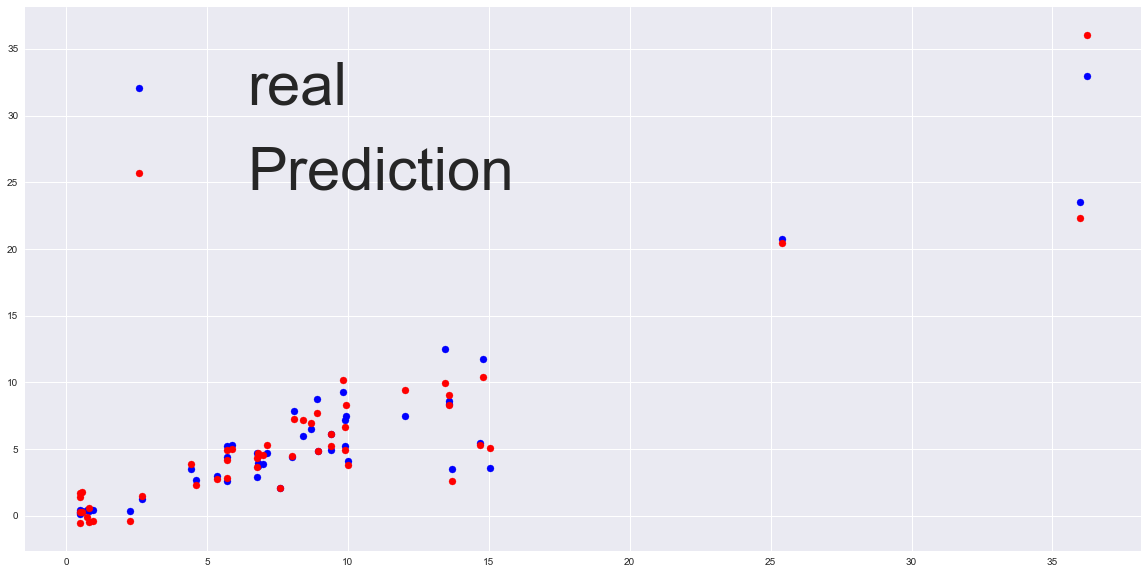

In [56]:
# show Model
plt.figure(figsize=(20,10))
plt.scatter(a, b, color='blue', label='real')
plt.scatter(c, d, color='red', label='Prediction')
plt.legend(fontsize=60)
plt.show()

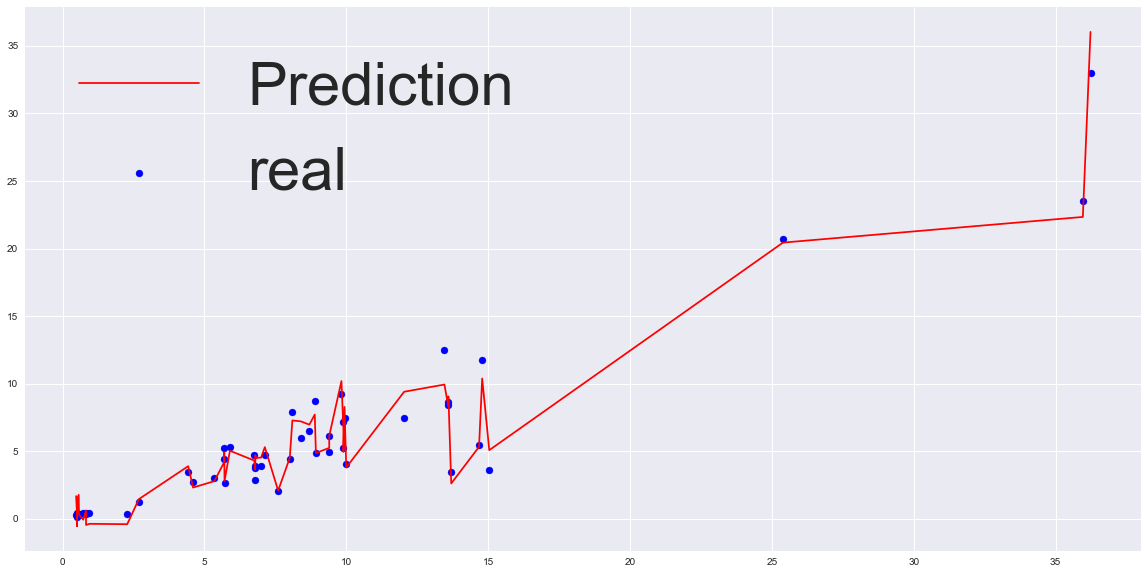

In [57]:
# show Model with linear plot
plt.figure(figsize=(20,10))
plt.scatter(a, b, color='blue', label='real')
plt.plot(c, d, color='red', label='Prediction')
plt.legend(fontsize=60)
plt.show()

### Predict of given data

### Inputs 

### Cost of this car ?
#### Present_Price = 11.23
#### Kms_Driven = 42000
#### Fuel_Type = petrol
#### Seller_Type = Dealer
#### Transmission = Manual
#### Owner = 1
#### Age = 10
#### Price ?

In [58]:
DataFrame.insert(0, 'Target', y_new)

In [59]:
DataFrame.columns

Index(['Target', 'Pres2_Fuel2', 'Pres2_Fuel', 'Pres2_kms2', 'Pres2_kms',
       'Pres_Fuel2', 'Pres_Fuel', 'Pres_kms2', 'Pres_kms', 'Owner2',
       'Fuel_Type2', 'Kms_Driven2', 'Present_Price2', 'Present_Price',
       'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner',
       'Age'],
      dtype='object')

In [60]:
# New data
Present_Price = 11.23
Kms_Driven = 42000
Fuel_Type = 2     # Petrol
Seller_Type = 2   # Dealer
Transmission = 2  # Manual
Owner = 1
Age = 10

Model_Input = pd.DataFrame({'Target':10,
                           'Pres2_Fuel2': [((Present_Price**2)*(Fuel_Type**2))],
                           'Pres2_Fuel':[((Present_Price**2)*(Fuel_Type))],
                           'Pres2_kms2':[((Present_Price**2)*(Kms_Driven**2))],
                           'Pres2_kms':[((Present_Price**2)*(Kms_Driven))],
                           'Pres_Fuel2':[((Present_Price)*(Fuel_Type**2))],
                           'Pres_Fuel':[((Present_Price)*(Fuel_Type))],
                           'Pres_kms2':[((Present_Price)*(Kms_Driven**2))],
                           'Pres_kms':[((Present_Price)*(Kms_Driven))],
                           'Owner2':[Owner**2],
                           'Fuel_Type2':[Fuel_Type**2],
                           'Kms_Driven2':[Kms_Driven**2],
                           'Present_Price2':[Present_Price**2],
                           'Present_Price':[Present_Price],
                           'Kms_Driven':[Kms_Driven],
                           'Fuel_Type':[Fuel_Type],
                           'Seller_Type':[Seller_Type],
                           'Transmission':[Transmission],
                           'Owner':[Owner],
                           'Age':[Age]})


In [61]:
Model_Input

,Target,Pres2_Fuel2,Pres2_Fuel,Pres2_kms2,Pres2_kms,Pres_Fuel2,Pres_Fuel,Pres_kms2,Pres_kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,10,504.4516,252.2258,2.224632e+11,5296741.8,44.92,22.46,1.980972e+10,471660.0,1,4,1764000000,126.1129,11.23,42000,2,2,2,1,10


In [62]:
Finall = DataFrame.append(Model_Input)

In [63]:
Finall

,Target,Pres2_Fuel2,Pres2_Fuel,Pres2_kms2,Pres2_kms,Pres_Fuel2,Pres_Fuel,Pres_kms2,Pres_kms,Owner2,Fuel_Type2,Kms_Driven2,Present_Price2,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,124.9924,62.4962,2.277986e+10,8.436987e+05,22.36,11.18,4.075110e+09,150930.0,0,4,729000000,31.2481,5.59,27000,2,2,2,0,5
1,4.75,819.1044,273.0348,1.682804e+11,3.913499e+06,85.86,28.62,1.763946e+10,410220.0,0,9,1849000000,91.0116,9.54,43000,3,2,2,0,6
2,7.25,388.0900,194.0450,4.619241e+09,6.694552e+05,39.40,19.70,4.689585e+08,67965.0,0,4,47610000,97.0225,9.85,6900,2,2,2,0,2
3,2.85,68.8900,34.4450,4.656964e+08,8.955700e+04,16.60,8.30,1.122160e+08,21580.0,0,4,27040000,17.2225,4.15,5200,2,2,2,0,8
4,4.60,424.7721,141.5907,8.504893e+10,2.003508e+06,61.83,20.61,1.237976e+10,291631.5,0,9,1802002500,47.1969,6.87,42450,3,2,2,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,4.00,139.2400,69.6200,1.253160e+11,2.088600e+06,23.60,11.80,2.124000e+10,354000.0,0,4,3600000000,34.8100,5.90,60000,2,2,2,0,4
246,3.35,484.0000,242.0000,9.356190e+11,1.064001e+07,44.00,22.00,8.505627e+10,967274.0,0,4,7732388356,121.0000,11.00,87934,2,2,2,0,10
247,11.50,1406.2500,468.7500,1.265625e+10,1.406250e+06,112.50,37.50,1.012500e+09,112500.0,0,9,81000000,156.2500,12.50,9000,3,2,2,0,2
248,5.30,139.2400,69.6200,1.039263e+09,1.902018e+05,23.60,11.80,1.761462e+08,32237.6,0,4,29855296,34.8100,5.90,5464,2,2,2,0,3


In [64]:
# it trains for us from index 249
x = Finall.drop(['Target'], axis=1)[:249]
y = Finall[['Target']][:249]
x_Finall = Finall.drop(['Target'], axis=1)[249:]

In [65]:
Model.fit(x,y)

LinearRegression()

In [66]:
y_pred = Model.predict(x_Finall)

In [67]:
y_pred

array([[5.2608749]])

## price is 5.26

### Range (4---6) is accepted